In [17]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

UsageError: Line magic function `%install_ext` not found.


In [422]:
import mlxtend
import numpy as np
import pandas as pd
import re

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import time
from functools import wraps

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.metrics import silhouette_score
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [423]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Importando o dataset

dataset depois do tratamento feito para a análise de Market Basket. 

In [37]:
ratingsDF = pd.read_pickle("..\\ProcessedData\\df.pkl")

In [38]:
ratingsDF.head()

,uid,id,rating,timestamp,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,1997-12-04 15:55:49,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,1997-10-01 23:06:30,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,1998-01-04 04:37:51,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,1997-11-10 05:03:55,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,1997-10-10 17:16:33,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
print("Número de usuários na base %i" % ratingsDF['uid'].nunique())

Número de usuários na base 943


In [40]:
print("Número de filmes na base %i" % ratingsDF['id'].nunique())

Número de filmes na base 1664


## Criando os vetores de features dos filmes

Cada filme será representado pelas notas que cada um dos usuários da base deu para aquele filme. O que siginifica que **cada filme será representado por vetores esparsos de tamanho 943**.

Sabemos da exploração que não há duplicatas para a chave **uid, id**, então:

In [41]:
ratings_id = ratingsDF.groupby(['id']).aggregate({'rating': len})

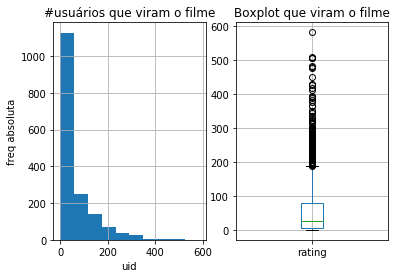

In [42]:
plt.figure(),
plt.subplot(1,2,1)
ratings_id.rating.hist()
plt.grid(True)
plt.title("#usuários que viram o filme")
plt.xlabel("uid")
plt.ylabel("freq absoluta")

plt.subplot(1,2,2)
ratings_id.boxplot()
plt.title("Boxplot que viram o filme")
plt.show()

In [43]:
print("Moda do número de usuários que viram o filme: %i" % ratings_id.rating.mode())

Moda do número de usuários que viram o filme: 1


In [44]:
print("Número de filmes com apenas uma avaliação: %i" % (ratings_id.rating == 1).sum())

Número de filmes com apenas uma avaliação: 135


## Criando a versão pivoteada do dataset

In [45]:
df_pivoted = pd.pivot_table(ratingsDF, columns=['uid'], values=['rating'], index=['id'], aggfunc=np.max)

In [46]:
# df_pivoted.fillna(0, inplace=True)

In [47]:
df_pivoted.head(5)

rating                                          ...                      \
uid    1    2   3   4    5    6    7   8   9    10  ...   934  935  936 937   
id                                                  ...                       
1      5.0  4.0 NaN NaN  4.0  4.0  NaN NaN NaN  4.0 ...   2.0  3.0  4.0 NaN   
2      3.0  NaN NaN NaN  3.0  NaN  NaN NaN NaN  NaN ...   4.0  NaN  NaN NaN   
3      4.0  NaN NaN NaN  NaN  NaN  NaN NaN NaN  NaN ...   NaN  NaN  4.0 NaN   
4      3.0  NaN NaN NaN  NaN  NaN  5.0 NaN NaN  4.0 ...   5.0  NaN  NaN NaN   
5      3.0  NaN NaN NaN  NaN  NaN  NaN NaN NaN  NaN ...   NaN  NaN  NaN NaN   

                                 
uid  938 939  940  941 942  943  
id                               
1    4.0 NaN  NaN  5.0 NaN  NaN  
2    NaN NaN  NaN  NaN NaN  5.0  
3    NaN NaN  NaN  NaN NaN  NaN  
4    NaN NaN  2.0  NaN NaN  NaN  
5    NaN NaN  NaN  NaN NaN  NaN  

[5 rows x 943 columns]

In [48]:
df_pivoted = pd.DataFrame(df_pivoted.values)

In [49]:
df_pivoted.head(10)

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
1,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,2.0,5.0,3.0,4.0,4.0,...,NaN,NaN,4.0,NaN,4.0,NaN,4.0,4.0,NaN,NaN
7,1.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
8,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,4.0,...,NaN,1.0,4.0,5.0,3.0,5.0,3.0,NaN,NaN,3.0
9,3.0,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dormato Esparso do dataset

o dataset pode ser codificado de forma esparsa antes do fill de NaN pelas médias, talvez gere ganho

In [50]:
df_pivoted_spase = df_pivoted.to_sparse()

## Fill de valores nulos

Os algoritimos que vamos utilizar são sensíveis aos valores nulos. Para diminuir esse efeito, podemos substituir zeros pela média das notas dos filmes desconsiderando os valores 0 (que são NAN na verdade);

In [51]:
filmMeanRating = df_pivoted.mean(axis=1)

> Obs: a função fill na por linha não está implementada no Pandas, por isso as transposições

In [52]:
df_pivoted = df_pivoted.T.fillna(filmMeanRating).T

In [53]:
df_pivoted.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,...,943.0,943.0,943.0,943.0,943.0,943.0,943.0,943.0,943.0,943.0
mean,3.878319,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0
std,0.642041,0.359043,0.372773,0.453487,0.284302,0.212022,0.632690,0.482161,0.586278,0.309907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0
25%,3.878319,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0
50%,3.878319,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0
75%,4.000000,3.206107,3.033333,3.550239,3.302326,3.576923,4.000000,3.995434,3.896321,3.831461,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.0,3.0,4.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0


## Decomposição do vetor de features

### PCA

In [54]:
pca_dim = 943

In [55]:
pca = PCA(n_components=pca_dim).fit(df_pivoted)

In [56]:
cumulativeVar = pd.Series(pca.explained_variance_ratio_.cumsum())

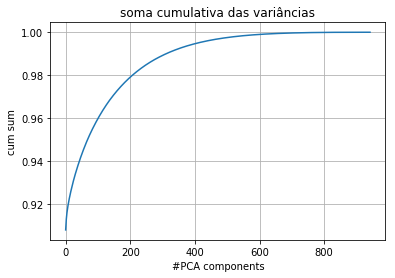

In [57]:
plt.figure(),
cumulativeVar.plot()
plt.grid(True)
plt.title("soma cumulativa das variâncias")
plt.xlabel("#PCA components")
plt.ylabel("cum sum")
plt.show()

a variância ao longo das 5 primeiras dimensões já é da ordem de **e-5**. Se reduzirmos o número de dimensões para apenas 2 temos:

In [292]:
pca_dim = 3
pca = PCA(n_components=pca_dim).fit(df_pivoted)

In [293]:
print("energia conservada pelas %i primeiras componentes do PCA %f" % (pca_dim, pca.explained_variance_ratio_.sum())) 

energia conservada pelas 3 primeiras componentes do PCA 0.912999


In [294]:
df_pca = pd.DataFrame(pca.transform(df_pivoted))

Data Scatter

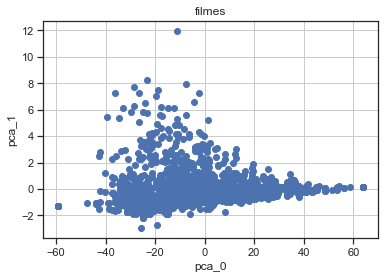

In [295]:
# plt.figure().gca(projection='3d')
plt.figure()
# plt.scatter(df_pca[0], df_pca[1], df_pca[2])
plt.scatter(df_pca[0], df_pca[1])
plt.grid(True)
plt.title("filmes")
plt.xlabel("pca_0")
plt.ylabel("pca_1")
plt.show()

## Clusterização

Posdemos executar a clusterização no espaço não transformado pelo PCA enquanto isso não gerar problemas de desempenho. Pode-se usar o PCA para fazer a projeção para 2D e faciliar a visualização dos clustes

In [156]:
# %%time
# plot_learning_curve(
#     estimator=kmeans, # clustering algorithm
#     X=df_pivoted,y=None, # None for unsupervisioned
#     train_sizes=(1.0,), # all for training
#     cv=10, #cross-validation maninfolds    
#     title="kmeans learning"
# )

### usando a norma L2 cooo medida de dessimilaridade

Primeiro devemos determinar o número de clusters

In [226]:
th_min = 0
th_max = 2
n_clusters_range = np.rint(np.logspace(th_min,th_max,num=30))

In [227]:
scores = []
time_elapsed = []

In [228]:
%%time
for n in n_clusters_range:
    start_time = time.time()
    kmeans = KMeans(n_clusters=int(n)).fit(df_pivoted)
    elapsed_time = time.time() - start_time
    scores.append(kmeans.inertia_)
    time_elapsed.append(elapsed_time)

Wall time: 48 s


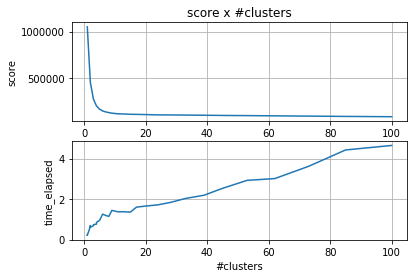

In [230]:
plt.figure(),
plt.subplot(2,1,1)
plt.plot( n_clusters_range, scores)
plt.grid(True)
plt.title("score x #clusters")
plt.ylabel("score")
plt.subplot(2,1,2)
plt.plot( n_clusters_range, time_elapsed)
plt.grid(True)
plt.xlabel("#clusters")
plt.ylabel("time_elapsed")
plt.show()

In [ ]:
#Scaling of data
# ss = StandardScaler()
# ss.fit_transform(df_pivoted_sparse)

clust_labels = kmeans.labels_

Por inspeção, há um joelho entre 10 e 20, vou repetir a análise para aumentar PARA ESSE RANGE

In [239]:
n_clusters_range2 = np.linspace(10,20,num=10)

In [245]:
scores2 = []
time_elapsed2 = []

In [246]:
%%time
for n in n_clusters_range2:
    start_time = time.time()
    kmeans = KMeans(n_clusters=int(n)).fit(df_pivoted)
    elapsed_time = time.time() - start_time
    scores2.append(kmeans.inertia_)
    time_elapsed2.append(elapsed_time)

Wall time: 14.3 s


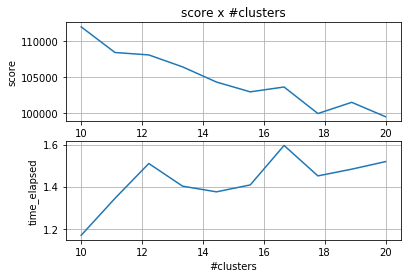

In [247]:
plt.figure(),
plt.subplot(2,1,1)
plt.plot( n_clusters_range2, scores2)
plt.grid(True)
plt.title("score x #clusters")
plt.ylabel("score")
plt.subplot(2,1,2)
plt.plot( n_clusters_range2, time_elapsed2)
plt.grid(True)
plt.xlabel("#clusters")
plt.ylabel("time_elapsed")
plt.show()

Por inspeção n=16, parece uma boa definição para o joelho

In [373]:
n_ = 16
kmeans = KMeans(n_clusters=n_).fit(df_pivoted)

In [374]:
clust_labels = kmeans.labels_

In [375]:
df = df_pca
df['cluster'] = clust_labels

In [376]:
filmsInClusterCount = pd.Series(data=df.groupby(['cluster']).count()[0])

Os clusters 1, 5, 8 e 15 são pequenos. testei algumas vezes na mão e chegeui ao númer de 10 como siginificativo

### Trenamento

Para determinar o número de clusters, procuramos por um joelho na gráfico de loss (norma L@) vs número de clusters

In [378]:
n_ = 10
kmeans = KMeans(n_clusters=n_).fit(df_pivoted)

In [379]:
clust_labels = kmeans.labels_

In [380]:
df = df_pca
df['cluster'] = clust_labels

In [381]:
filmsInClusterCount = pd.Series(data=df.groupby(['cluster']).count()[0])

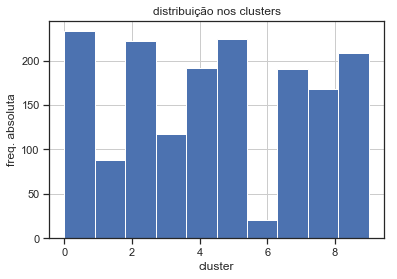

In [390]:
plt.figure(),
ax = df.cluster.hist(bins=10)
plt.xlabel("cluster")
plt.ylabel("freq. absoluta")
plt.title('distribuição nos clusters')
plt.show()

### Visualizando so resultados

C:\Users\souza\Anaconda3\envs\movielens_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\souza\Anaconda3\envs\movielens_env\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\souza\Anaconda3\envs\movielens_env\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\souza\Anaconda3\envs\movielens_env\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc

<Figure size 432x288 with 0 Axes>

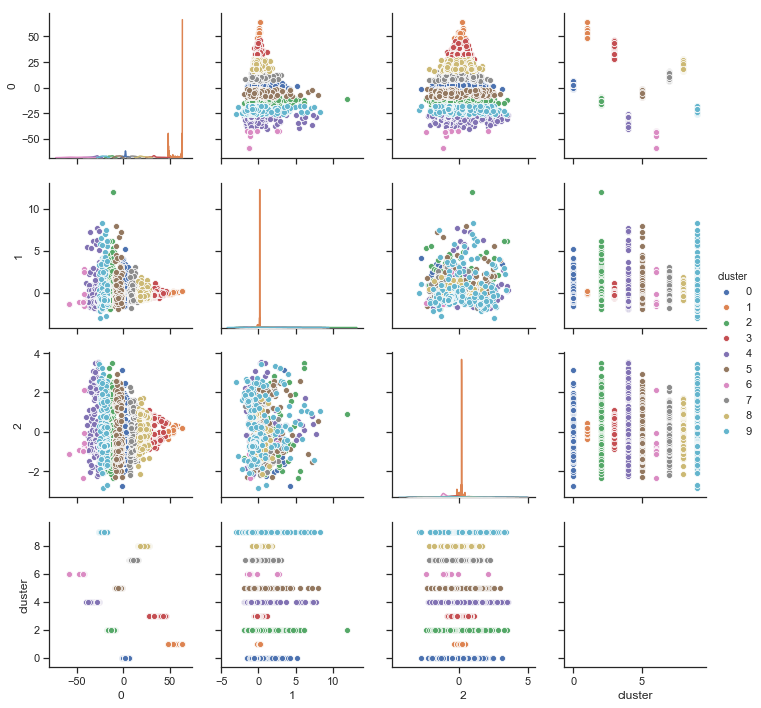

In [383]:
plt.figure(),
g = sns.pairplot( df, hue="cluster", x_vars=df_pca.columns, y_vars=df_pca.columns)
plt.show()

##### Conclusões
> Aparentemente, os clusters usados separaram os dados (para a maioria dos clusters), com planos ortogonais ao eixo 0 do PCA.

In [410]:
to_enrich = ratingsDF.groupby('id').agg(
    {'timestamp':'first', 
     'movie_title':'first', 
     'release_date':'first',
     'unknown':'first', 
     'Action':'first', 
     'Adventure':'first', 
     'Animation':'first', 
     'Children\'s':'first',
       'Comedy':'first', 
     'Crime':'first', 
     'Documentary':'first', 
     'Drama':'first', 
     'Fantasy':'first', 
     'Film-Noir':'first',
       'Horror':'first', 
     'Musical':'first', 
     'Mystery':'first', 
     'Romance':'first', 
     'Sci-Fi':'first', 
     'Thriller':'first', 
     'War':'first',
    'Western':'first'
    })

In [434]:
df_full = pd.concat([df, to_enrich], axis=1, join='inner')

In [438]:
df_full[df_full['cluster'] == 0].head(10)
df_full = df_full.rename(mapper={0:'pca_0', 1:'pca_1', 2:'pca_2'}, axis='columns')

In [441]:
df_full.head(10)

,pca_0,pca_1,pca_2,cluster,timestamp,movie_title,release_date,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,-4.009658,2.882197,2.483208,5,1998-02-17 17:28:52,Toy Story (1995),1995-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.331258,1.437441,-0.431773,0,1997-09-30 16:14:13,GoldenEye (1995),1995-01-01,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,-14.598549,1.232478,0.178274,2,1997-11-08 04:30:41,Four Rooms (1995),1995-01-01,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-6.915478,1.877834,-1.029522,5,1998-02-03 15:18:17,Get Shorty (1995),1995-01-01,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,-15.333143,-0.715077,-1.510251,2,1998-03-03 06:29:36,Copycat (1995),1995-01-01,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,-22.239165,2.549541,-0.685015,9,1997-10-01 23:10:39,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,1995-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-28.257633,1.814728,0.469287,4,1997-10-29 01:48:36,Twelve Monkeys (1995),1995-01-01,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,-25.235370,-1.055493,-0.375201,9,1997-11-26 19:30:42,Babe (1995),1995-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-23.154377,-1.082961,-1.547191,9,1998-01-09 00:05:28,Dead Man Walking (1995),1995-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,-23.745549,3.040382,0.021387,9,1997-11-14 16:28:41,Richard III (1995),1996-01-22,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [442]:
clusters_samples = {}

In [444]:
for c in range(0, n_):
    in_cluster = df_full[df_full.cluster == c]
    print("Cluster %i" % c)
    print(in_cluster.sample(n=10)['movie_title'])
    clusters_samples[c] = in_cluster

Cluster 0
1429                                 Sliding Doors (1998)
340                                  Boogie Nights (1997)
73                                        Maverick (1994)
1195    Strawberry and Chocolate (Fresa y chocolate) (...
638     Return of Martin Guerre, The (Retour de Martin...
319                       Everyone Says I Love You (1996)
565                          Village of the Damned (1995)
1626           Nobody Loves Me (Keiner liebt mich) (1994)
1496                                       Carpool (1996)
1464                  Stars Fell on Henrietta, The (1995)
Name: movie_title, dtype: object
Cluster 1
1314                            Surviving the Game (1994)
823                               Mulholland Falls (1996)
1573    Spirits of the Dead (Tre passi nel delirio) (1...
1318                                       Catwalk (1995)
1560                 Clean Slate (Coup de Torchon) (1981)
1332    My Life and Times With Antonin Artaud (En comp...
1537               